<a href="https://colab.research.google.com/github/Josephnyingi/team2_dcs6_loan_prediction/blob/main/Univariate_analysis_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

> Load dataset

In [ ]:
loans = pd.read_csv('/content/train_dataset - train_dataset.csv')
#test = pd.read_csv('/content/test_dataset - test_dataset.csv')

> Check size

In [ ]:
loans.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


description 
deliwuency <- In a financial sense, delinquency occurs as soon as a borrower misses a payment on a loan. In contrast, default occurs when a borrower fails to repay the loan as specified in the original contract

In [ ]:
loans.shape

(164309, 14)

In [ ]:
loans.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

> A lot of null but cant be removed.

* Length employed <- Some borrowere may have not been previously employed
* Home owner <-
* Annual Income <- 
* Months since deliquency <- There are customers who are timely in their repayments hence their count could be empty since they havent while those at o months could be in a deliquent state but have not yet exceeded 1 month. It could be floored up to 0, however this would imply deliquent users and non deliquent users have the same level of deliquency. a bit problematic

In [ ]:
(loans['Months_Since_Deliquency']).mean()

34.22935598577637

In [ ]:
loans.duplicated().sum()

0

> No duplicates

In [ ]:
loans.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [ ]:
loans['Loan_Amount_Requested'] = loans['Loan_Amount_Requested'].str.replace(',', '')
loans['Loan_Amount_Requested'] = loans['Loan_Amount_Requested'].astype('int')

## Checking for annomalies

## Cleaning up

In [ ]:
loans['Months_Since_Deliquency'].value_counts().head(20)

9.0     1518
10.0    1510
14.0    1487
12.0    1484
8.0     1474
6.0     1440
13.0    1436
15.0    1433
7.0     1416
18.0    1390
16.0    1360
20.0    1333
11.0    1327
19.0    1325
17.0    1316
21.0    1297
27.0    1255
23.0    1224
26.0    1189
25.0    1189
Name: Months_Since_Deliquency, dtype: int64

In [ ]:
loans['Months_Since_Deliquency'].mode()

0    9.0
dtype: float64

In [ ]:
loans['Months_Since_Deliquency'].min()

0.0

In [ ]:
# Creating the classifications of the customers from 
def status(x):
  if x<=12.0:
    return 'Medium low risk'
  elif ((x>12.0) & (x<=30.0)):
    return 'Medium risk'
  elif ((x>30.0) & (x<=50.0)):
    return 'Medium high risk'
  elif ((x>50.0) & (x<=72.0)):
    return 'High risk'
  elif x>72.0:
    return 'Highest risk'
  else:
    return 'Low risk'

In [ ]:
loans['Risk level']=loans.apply(lambda x: status(x['Months_Since_Deliquency']),axis=1)

In [ ]:
loans['Months_Since_Deliquency'].isna().sum()

88379

In [ ]:
loans['Loan_Amount_Requested'].value_counts()

10000    11622
12000     9018
15000     8459
20000     7993
35000     5844
         ...  
33100        1
29650        1
25425        1
31925        1
31675        1
Name: Loan_Amount_Requested, Length: 1290, dtype: int64

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-68-7f0d6bc79ca7>", line 11, in animate
    data = open('stock.txt','r').read()
FileNotFoundError: [Errno 2] No such file or directory: 'stock.txt'


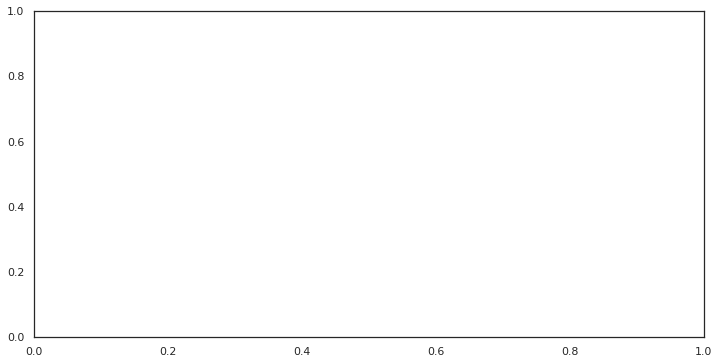

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')	
	
    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()

## Checking for Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


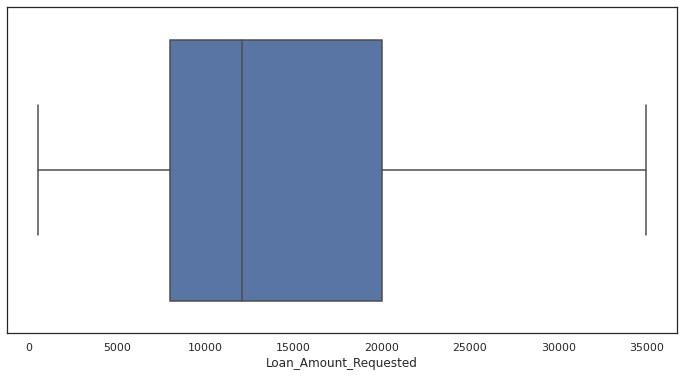

In [ ]:
sns.boxplot(loans['Loan_Amount_Requested'])

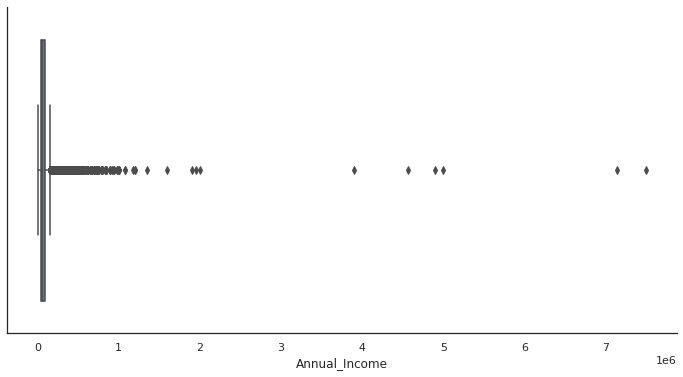

In [ ]:
sns.boxplot(x=loans['Annual_Income'])
sns.despine()

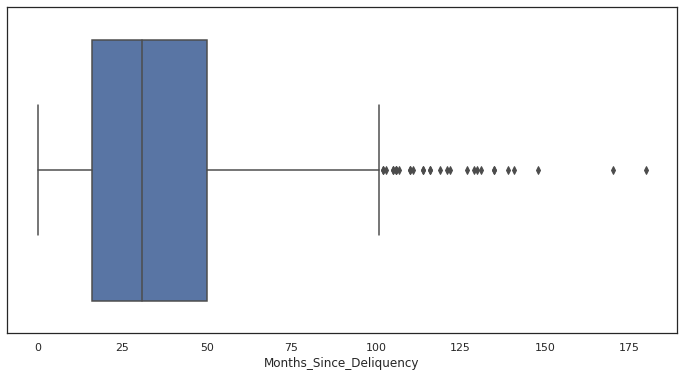

In [ ]:
sns.boxplot(x=loans['Months_Since_Deliquency'])

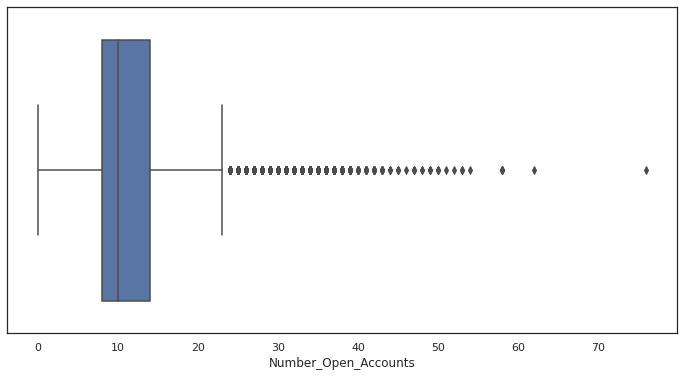

In [ ]:
sns.boxplot(x=loans['Number_Open_Accounts'])

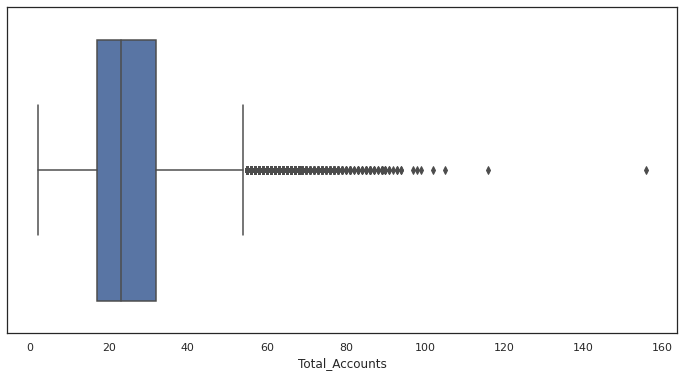

In [ ]:
sns.boxplot(x=loans['Total_Accounts'])

#

In [ ]:
sns.set(rc={'figure.figsize':(12,6)},style="white")

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
loans.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Risk level
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1,Low risk
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,Medium risk
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3,Low risk
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3,Low risk
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1,Low risk


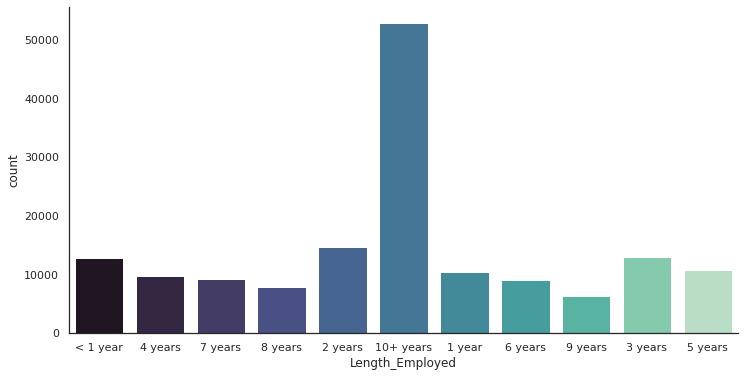

In [ ]:
# Plotting bar chart to show length employed
sns.countplot(x='Length_Employed',data=loans,palette='mako')
sns.despine()

* 10+ years were the highest to request for a loan 

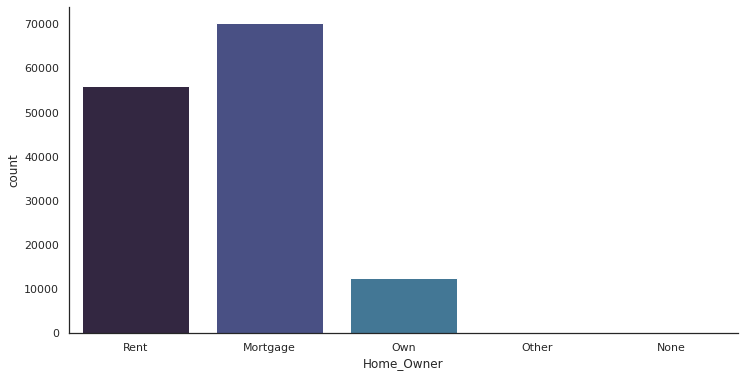

In [ ]:
# Plotting bar chart to show home ownership
sns.countplot(x='Home_Owner',data=loans,palette='mako')
sns.despine()

* The Mortgage home owners are the highest and owned home_owners lowest

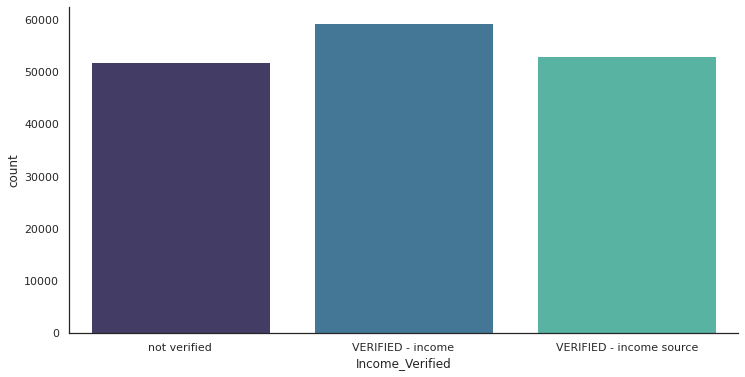

In [ ]:
# Plotting bar chart to show income verified 
sns.countplot(x='Income_Verified',data=loans,palette='mako')
sns.despine()

* On verified income individuals the ones who have Verified income have the highest count and not verified lowest count. 

In [ ]:
# Frequency distribution table for purpose of loan attribute
loans['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

* From the value counts the loans were purposely for debt consolidation. 

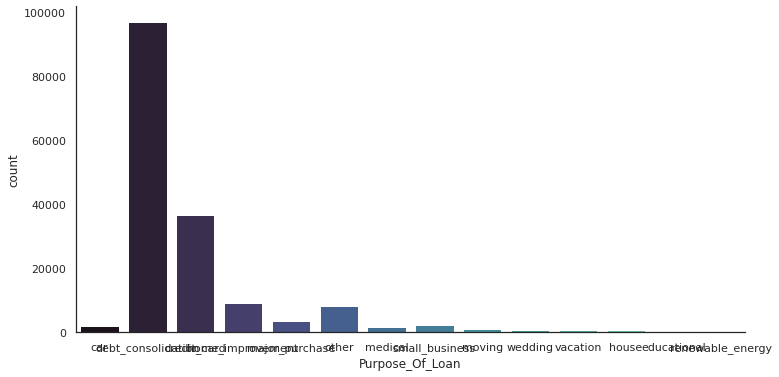

In [ ]:
# Plotting bar chart to show purpose of loan 
sns.countplot(x='Purpose_Of_Loan',data=loans,palette='mako')
sns.despine()

* Debt_consolidatiion had the highest count refering that loans taken were purposely for debt consolidation. 

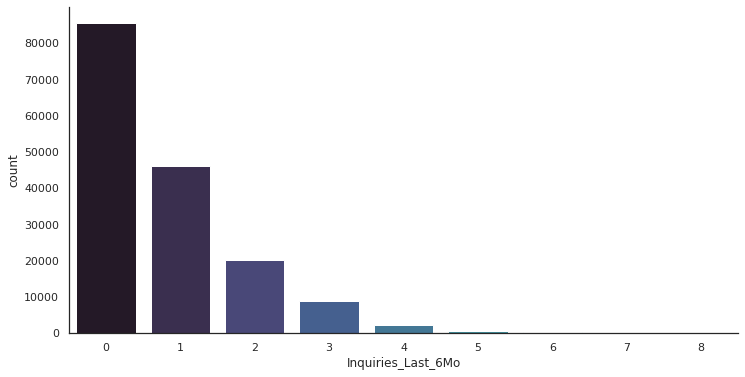

In [ ]:
# Plotting bar chart to show inquiries in last 6 months. 
sns.countplot(x='Inquiries_Last_6Mo',data=loans,palette='mako')
sns.despine()

* Most of the enquiries are done during the initial months, decreasing towards the sixth month.

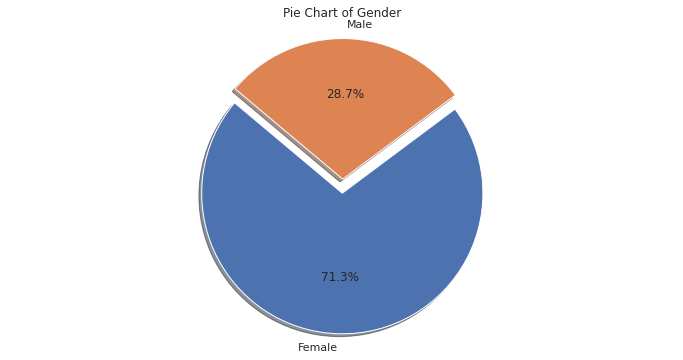

In [ ]:
#Pie chart showing percentage distribution of gender variable

Gender = loans['Gender'].value_counts()
labels = loans.Gender.unique()
explode = (0.1, 0) 
plt.pie(Gender, labels = labels, explode = explode,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Gender')
plt.show()

* Males have the highest percentage in loan applications with a 71 percent higher than females with percentage of 29 percent.

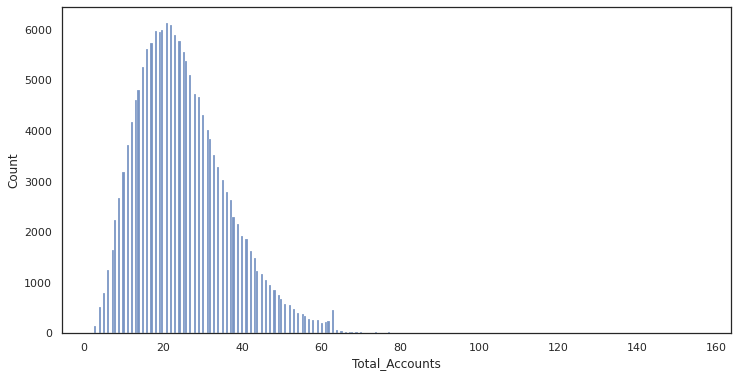

In [ ]:
# Plotting histogram for Total Accounts 
sns.histplot(loans['Total_Accounts'])

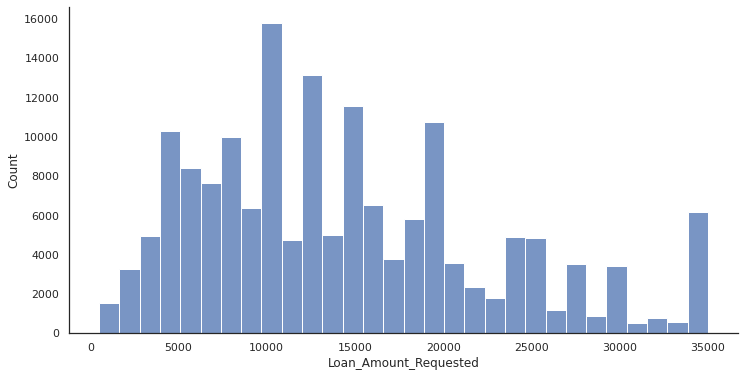

In [ ]:
# Plotting bar chart to show Loan amount requested
sns.histplot(x='Loan_Amount_Requested',data=loans,palette='mako',bins=30)
sns.despine()

* The most loan Amount value requested is 10000. 

#####Measures of Central Tendency

In [ ]:
# mean, mode and median Annual income

print('Mean Annual income is ' + str(loans.Annual_Income.mean()))
print('Median Annual income is ' + str(loans.Annual_Income.median()))
print('Mode Annual income is ' + str(loans.Annual_Income.mode()))

Mean Annual income is 73331.15943386468
Median Annual income is 63000.0
Mode Annual income is 0    60000.0
dtype: float64


In [ ]:
# mean, mode and median Total accounts

print('Mean  Total accounts is ' + str(loans.Total_Accounts.mean()))
print('Median Total accounts is ' + str(loans.Total_Accounts.median()))
print('Mode  Total accounts is ' + str(loans.Total_Accounts.mode()))

Mean  Total accounts is 25.06766519180325
Median Total accounts is 23.0
Mode  Total accounts is 0    21
dtype: int64


In [ ]:
#checking for measures of central tendency of relevant columns
loans = loans[['Loan_Amount_Requested','Annual_Income','Inquiries_Last_6Mo','Number_Open_Accounts', 'Total_Accounts']]
loans.describe()

,Loan_Amount_Requested,Annual_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts
count,164309.00000,1.392070e+05,164309.000000,164309.000000,164309.000000
mean,14349.33692,7.333116e+04,0.781698,11.193818,25.067665
std,8281.86870,6.037750e+04,1.034747,4.991813,11.583067
min,500.00000,4.000000e+03,0.000000,0.000000,2.000000
25%,8000.00000,4.500000e+04,0.000000,8.000000,17.000000
50%,12075.00000,6.300000e+04,0.000000,10.000000,23.000000
75%,20000.00000,8.869750e+04,1.000000,14.000000,32.000000
max,35000.00000,7.500000e+06,8.000000,76.000000,156.000000
